# PERCEPTRON LEARNING ALGORITHM(PLA)
**PLA is a supervised machine learning algorithm that was developed in 1957 by Frank Rosenblatt and first implemented in IBM704. PLA is the simplest model of a neuron that illustrates how a neural network works.**


![PLA algorithm explained](1_gKFs7YU44vJFiS2rF3-bpg.png)

*In the above figure the perceptron has infinte inputs:$x_0,x_1,x_2,x_3...x_n$ and one output(y). The inputs variable's importance is determined by the respective weights:$w_0,w_1,w_2,w_3...w_n$ assigned to these inputs. The yield could be a 0 or 1 depending on the weighted entirety of the data sources.*

**NOTE: PLA should be used when the data is linearly separable.**

*In this program I will be using **Fish.csv dataset** that I downloaded from Kaggle.com. The original dataset had about 7 different species but I modified the dataset to only 2 species that majority of the data was categorized into.i.e Bream and Perch.*

In [1]:
using Plots
using CSV
using DataFrames

data = CSV.read("Fish.csv", DataFrame);

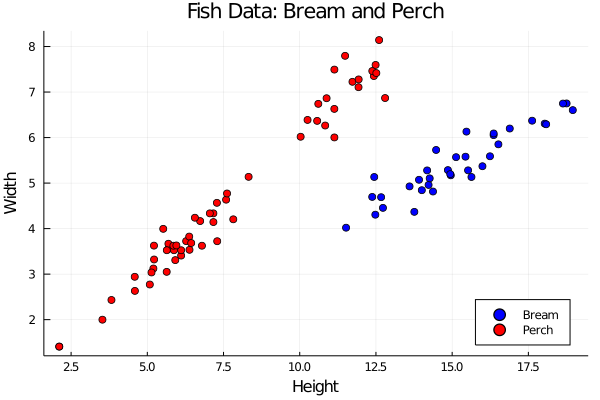

In [2]:
x_data = [x for x in zip(data.Height[1:91], data.Width[1:91])]

y_data = [y == "Bream" ? 1 : -1 for y in data.Species[1:91]]
scatter(x_data[1:36],
        label = "Bream",
        color = "blue",
        xaxis = "Height",
        yaxis = "Width",
        title = "Fish Data: Bream and Perch")

scatter!(x_data[36:91],
        label = "Perch",
        color = "red",
        legend = :bottomright)


In [3]:
function sign(weights, x)
    x̄ = [1.0, x[1], x[2]]
    return weights'x̄ > 0 ? 1 : -1
end 


function perceptron_update_rule(weights, x, y)
    if sign(weights,x) != y
        weights += y*[1.0, x[1], x[2]]
    end 
    return weights
end 
    

perceptron_update_rule (generic function with 1 method)

In [4]:
function PLA(X, Y; epochs = 100)
    w = randn(3)
    
    counter = 1
    while counter < epochs
        for i = 1:length(X)
            w = perceptron_update_rule(w, X[i], Y[i])
        end
        counter += 1
    end
    return w
    
end

PLA (generic function with 1 method)

In [5]:
w = PLA(x_data, y_data; epochs = 100)

3-element Array{Float64,1}:
 -3.2766848859860573
  1.721882585872784
 -3.4565616157811423

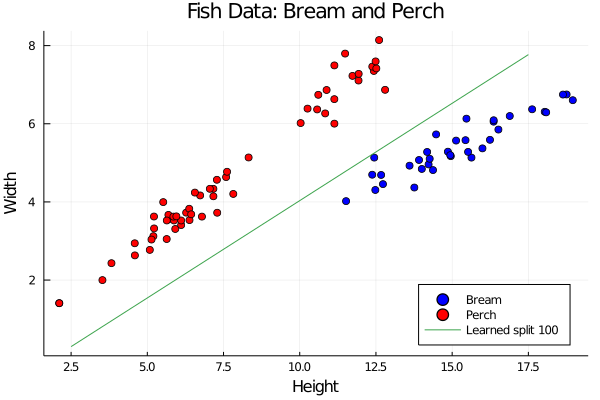

In [6]:
plot!([(x, (-w[2]*x - w[1])/w[3]) for x =2.5:18],
        label = "Learned split 100",
        legend = :bottomright)

In [7]:
function predictor(weights, x)
    return sign(weights, x) == 1 ? "Bream" : "Perch"
end

predictor (generic function with 1 method)

In [8]:
data.Species[30]

"Bream"

In [9]:
predictor(w, (data.Height[30], data.Width[30]))

"Bream"

In [10]:
k = rand([1,91])
println("The true label is: ", data.Species[k])
println("The true label is: ", predictor(w, (data.Height[k], data.Width[k])))

The true label is: Bream
The true label is: Bream
